#다변수 확률변수

- 변수가 여러개일 때 분포를 알아보고 연관된 분포 혹은 결과값들을 알아봅시다.
- 변수가 여러개가 되면 확률분포가 결합되어 결합확률분포함수라고 합니다.
- 두 개의 확률변수 값의 결합확률분포를 알고 있을 때 두 개 중에 하나의 확률분포를 알고 있으면 나머지 하나의 확률분포도 알 수 있다.

###이산 데이터

- X, Y 확률질량함수
      X의 확률질량함수 = px(x)
      Y의 확률질량함수 = px(y)
      결합 확률 질량함수 = pxy(x,y)
              ex) 주사위


In [76]:
import pandas as pd
import seaborn as sns # 시각적으로 더 있어보이게 그려주는 패키지.
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy as sp # 통계 라이브러리

#한글 패키지
!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
# 영어, 수학에 대한 학점이 확률변률변수
grades = ['A', 'B', 'C', 'D', 'E', 'F']
scores = pd.DataFrame(
    [
        [1, 2, 1, 0, 0, 0], # 영어 A 
    [0, 2, 3, 1, 0, 0], # 영어 B
    [0, 4, 7, 4, 1, 0],
    [0, 1, 4, 5, 4, 0],
    [0, 0, 1, 3, 2, 0],
    [0, 0, 0, 1, 2, 1]
     ],
     columns = grades, index=grades
) # 총 50명

scores.index.name = '수학'
scores.columns.name = '영어'
scores





영어,A,B,C,D,E,F
수학,,,,,,
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


In [78]:
# 결합확률질량함수로 나타내기
scores.values.sum() # 50명 중 1명이 A A를 받았다.

50

In [79]:
scores/scores.values.sum()

영어,A,B,C,D,E,F
수학,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


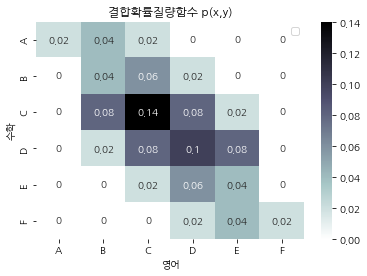

In [80]:
pmf = scores/scores.values.sum()
sns.heatmap(pmf, annot=True, cmap=mpl.cm.bone_r, xticklabels=grades, yticklabels=grades)
plt.title('결합확률질량함수 p(x,y)')
plt.legend()
plt.show()

## 주변확률질량함수


결합확률질량함수에서 단변수 확률질량함수를 구하는 것
- 규칙


$${p_x}(x) = \Sigma {pxy}(x,{y_i})$$


$${p_x}(y) = \Sigma {pxy}({x_i},y)$$

In [81]:
pmf

영어,A,B,C,D,E,F
수학,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


In [82]:
# 영어 x에 대한 확률질량함수
# 1명이 영어 ' '등급을 받을 확률
pmf.sum()

영어
A    0.02
B    0.18
C    0.32
D    0.28
E    0.18
F    0.02
dtype: float64

In [83]:
# 수학 y에 대한 확률질량함수
pmf.sum(axis=1)

수학
A    0.08
B    0.12
C    0.32
D    0.28
E    0.12
F    0.08
dtype: float64

In [84]:
# 공연산 하기위해 차원 하나씩 높이기
x_english = pmf.sum()[:,np.newaxis]
y_math = pmf.sum(axis=1)[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 조건부 확률질량변수

이산변수 = 1명, A등급 등등

X, Y 변수 중 하나의 변수가 특정 값으로 고정되는 경우, 나머지 하나의 변수의 확률질량함수를 구하는 것
PXY = 결합합률질량함수

$$PX|Y(x|y)=\frac{PXY(x,y)}{PY(y)}$$   
$$PX|X(y|x)=\frac{PXY(x,y)}{PY(x)}$$


In [85]:
import string
string.ascii_uppercase[:6]

'ABCDEF'

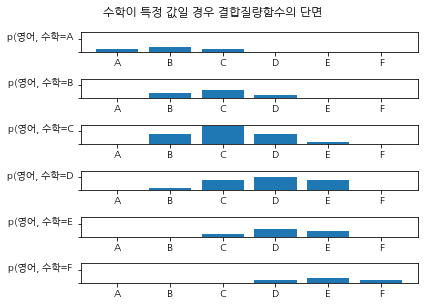

In [86]:
grades = ['A', 'B', 'C', 'D', 'E', 'F']

x = np.arange(6)
for i, y in enumerate(grades):
  ax = plt.subplot(6, 1, i+1)
  ax.tick_params(labelleft=False)
  plt.bar(x, pmf.iloc[i,:])   # 수학 고정, 영어 점수 알고싶다.
  plt.ylabel(f'p(영어, 수학={y}', rotation=0, labelpad=40)
  plt.ylim(0, 0.15)
  plt.xticks(range(6), grades)

plt.suptitle('수학이 특정 값일 경우 결합질량함수의 단면', y = 1.05)
plt.tight_layout() # 타이틀이 겹치지 않도록.
plt.show()

# 수학 A 받는 사람 뽑았을 때 영어 접수 제일 높은 사람은 B
# 수학 C 받은 사람 뽑았을 때 영어 점수가 C 받을 확률이 제일 높다.

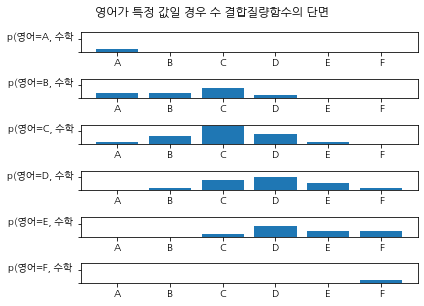

In [87]:
grades = ['A', 'B', 'C', 'D', 'E', 'F']

x = np.arange(6)
for i, y in enumerate(grades):
  ax = plt.subplot(6, 1, i+1)
  ax.tick_params(labelleft=False)
  plt.bar(x, pmf[y])   # y 에 있는 값 다 들고오기. 영어 고정, 수학 점수 알고싶다.
  plt.ylabel(f'p(영어={y}, 수학', rotation=0, labelpad=40)
  plt.ylim(0, 0.15)
  plt.xticks(range(6), grades)

plt.suptitle('영어가 특정 값일 경우 수 결합질량함수의 단면', y = 1.05)
plt.tight_layout()
plt.show()

### 다변수 연속확률변수


### 결합누적확률분포함수

이산확률분포처럼 단순 사건을 이용할 수 없음. (A,B,C,D)
키, 몸무게, 속도, 시간, 온도같은 것들은 값을 지정할 수가 없다.

      CDF -> 미분 -> PDF
      결합누적 확률분포함수 -> 미분 -> 결합확률밀도함수

$${F_{XY}} = P({X<x, Y<y})$$

- 특성
$${F{X_Y}}(∞, ∞) = 1$$   
$${F{XY}}(-∞,y) = {F_{XY}}(x, -∞) = 0$$

### 결합확률 밀도함수
결합누적확률분포함수를 미분해서 정의

$${P_{XY}}(x,y)$$

- 특성
      적분하면 1
$$ ∫∫{P_{XY}}(x,y)dxdy $$


In [88]:
# 결합 확률밀도함수 표현

mu = [70, 170] # 몸무게, 키
'''
공분산 행렬: [
  [분산,공분산],
  [공분산, 분산]
]

공분산 행렬 만드는 이유: 다변수 정규분포를 생성해 주기 위해
'''

cov =[
    [150, 140], # 몸무게에 대한 분산
    [140, 300], # 키에 대한 분산
] 

rv = sp.stats.multivariate_normal(mu, cov)
rv.mean

array([ 70., 170.])

In [89]:
x, y = np.linspace(20,120,100), np.linspace(100, 250, 100) # x : 몸무게, y : 키 // 20 ~ 120 사이의 값을 100가지로 나눠줘라

In [90]:
xm, ym = np.meshgrid(x,y) # 3D를 위해

z = rv.pdf(np.dstack([xm,ym])) # dstack : 두개의 배열를 쌓는 것
np.dstack([x,y]) # 꼭 이렇게 넣어줘야함 pdf에는

array([[[ 20.        , 100.        ],
        [ 21.01010101, 101.51515152],
        [ 22.02020202, 103.03030303],
        [ 23.03030303, 104.54545455],
        [ 24.04040404, 106.06060606],
        [ 25.05050505, 107.57575758],
        [ 26.06060606, 109.09090909],
        [ 27.07070707, 110.60606061],
        [ 28.08080808, 112.12121212],
        [ 29.09090909, 113.63636364],
        [ 30.1010101 , 115.15151515],
        [ 31.11111111, 116.66666667],
        [ 32.12121212, 118.18181818],
        [ 33.13131313, 119.6969697 ],
        [ 34.14141414, 121.21212121],
        [ 35.15151515, 122.72727273],
        [ 36.16161616, 124.24242424],
        [ 37.17171717, 125.75757576],
        [ 38.18181818, 127.27272727],
        [ 39.19191919, 128.78787879],
        [ 40.2020202 , 130.3030303 ],
        [ 41.21212121, 131.81818182],
        [ 42.22222222, 133.33333333],
        [ 43.23232323, 134.84848485],
        [ 44.24242424, 136.36363636],
        [ 45.25252525, 137.87878788],
        [ 46

In [91]:
z

array([[4.80956464e-08, 5.87892243e-08, 7.09996294e-08, ...,
        5.91605555e-24, 2.24679741e-24, 8.43066779e-25],
       [5.88618862e-08, 7.25587289e-08, 8.83713615e-08, ...,
        1.64105394e-23, 6.28518486e-24, 2.37837124e-24],
       [7.10681108e-08, 8.83474034e-08, 1.08512357e-07, ...,
        4.49082007e-23, 1.73454025e-23, 6.61926091e-24],
       ...,
       [5.99937040e-27, 1.66211031e-26, 4.54967526e-26, ...,
        2.17854191e-08, 1.87525268e-08, 1.59485080e-08],
       [1.97113449e-27, 5.50723936e-27, 1.52026059e-26, ...,
        1.62232815e-08, 1.40830301e-08, 1.20786918e-08],
       [6.38909029e-28, 1.80019789e-27, 5.01150145e-27, ...,
        1.19185570e-08, 1.04338505e-08, 9.02468243e-09]])

Text(0.5, 1.0, '결합확률밀도함수 P(x,y)')

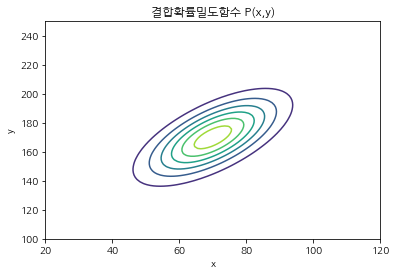

In [92]:
plt.contour(x, y, z) # 등고선 느낌
plt.xlabel('x')
plt.ylabel('y')
plt.title('결합확률밀도함수 P(x,y)')

# 가운데 부분이 가장 높은 밀도.

### 주변확률밀도함수
- 하나의 변수를 가중평균을 하고 나머지 하나의 변수에 대해서 확률밀도함수를 구하는 것   
- 결합확률 밀도함수를 통해 단일변수의 확률밀도함수를 구하는 것 

$${P_X}(x) = ∫{P_{XY}}(x,y)dy$$   
$${P_Y}(y) = ∫{P_{XY}}(x,y)dy$$

(120.0, 220.0)

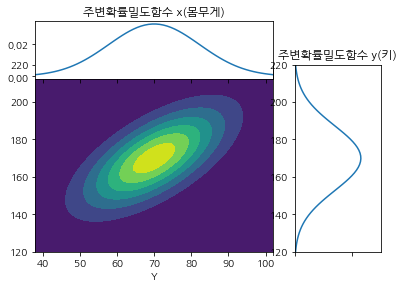

In [93]:
# 적분해보기

from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps

mu = [70, 170] # 몸무게, 키
cov =[
    [150, 140], # 몸무게에 대한 분산
    [140, 300], # 키에 대한 분산
] 

x = np.linspace(20, 120, 100)
y = np.linspace(100, 250, 100)

# 3차원 그래프 그려주기
xm, ym = np.meshgrid(x,y)
rv = sp.stats.multivariate_normal(mu, cov)  # rv : 몸무게와 키에 대한 가변수정규분포
z = rv.pdf(np.dstack([xm,ym]))

fx = [simps(z1,y) for z1 in z.T] # x값에 대해 가져오기위한 전치(T).
fy = [simps(z1, x) for z1 in z]

left, width = 0.1, 0.55
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05  # + 0.05를 해준 이유는 변화를 보기 위해서.

# 하나로 뭉치는 작업
rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.xaxis.set_major_formatter(NullFormatter())

ax1.contourf(xm, ym, z) # 색을 full로~
ax1.set_title('결합확률분포함수')
ax1.set_xlabel('x')
ax1.set_xlabel('Y')

ax2.plot(x, fx)
ax2.set_title('주변확률밀도함수 x(몸무게)')

base = ax3.transData
# 그려주려는 그래프
rot = transforms.Affine2D().rotate_deg(-90) # y 그래프를 90도 회전시켜서 보여주기 위해.
plt.plot(-y, fy, transform = rot + base)
plt.title('주변확률밀도함수 y(키)')

ax1.set_xlim(38, 102)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.03)

ax1.set_ylim(120, 220)
ax3.set_ylim(120, 220)

### 조건부 확률 밀도함수
다 변수 확률 변수 중에 하나가 특정한 값일 경우(가정) 나머지 확률밀도함수를 조건부 확률밀도 함수라고 한다.

분모 : density
$${P_{X|Y}}(x|y)=\frac{P_{XY}(x,y)}{P_Y(y)}$$   


$${P_{Y|X}}(y|x)=\frac{P_{XY}(x,y)}{P_X(x)}$$

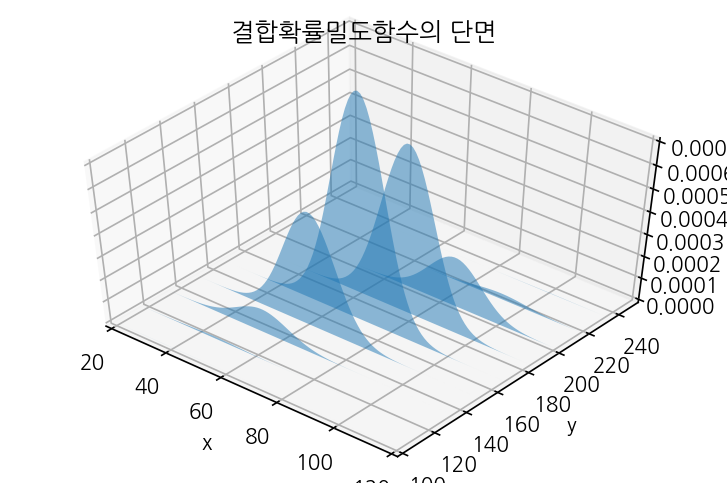

In [94]:
from matplotlib.collections import PolyCollection
from matplotlib import colors as mccolor

mu = [70, 170] # 몸무게, 키
cov =[
    [150, 140], # 몸무게에 대한 분산
    [140, 300] # 키에 대한 분산
] 

x = np.linspace(20, 120, 100)
y = np.linspace(100, 250, 10)

# 3차원 그래프 그려주기

xm, ym = np.meshgrid(x,y)
rv = sp.stats.multivariate_normal(mu, cov)  # rv : 몸무게와 키에 대한 가변수정규분포
z = rv.pdf(np.dstack([xm,ym]))

fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

xs = np.hstack([0, x, 0])
zs = np.zeros_like(xs)
verts = []

for i, y1 in enumerate(y):
  zs[1:-1] = z[i]
  verts.append(list(zip(x,zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=y, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20,120)
ax.set_ylim(100, 250)
ax.set_zlim3d(0,0.0007)
ax.view_init(50,-50)
plt.title('결합확률밀도함수의 단면')
plt.show()

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

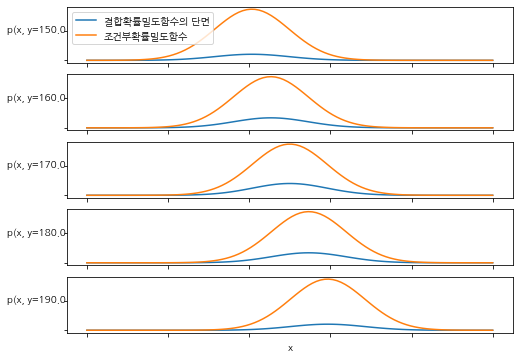

In [97]:
mu = [70, 170] # 몸무게, 키
cov =[
    [150, 140], # 몸무게에 대한 분산
    [140, 300] # 키에 대한 분산
] 

n = 10
x = np.linspace(20, 120, 100)
y = np.linspace(100, 250, 16)

xm, ym = np.meshgrid(x,y)
rv = sp.stats.multivariate_normal(mu, cov)  # rv : 몸무게와 키에 대한 가변수정규분포
z = rv.pdf(np.dstack([xm,ym]))

plt.figure(figsize=(8,6))

for i, j in enumerate(range(5, 10)):
  ax = plt.subplot(5, 1, i+1)
  ax.tick_params(labelleft=False)
  plt.plot(x, z[j,:] * 10, label = '결합확률밀도함수의 단면') # 나누기 전
  
  # 적분하면 조건부확률밀도함수가 나온다.
  density = simps(z[j,:], x)
  plt.plot(x, z[j,:] / density, label='조건부확률밀도함수') # 나눈 후
  ax.xaxis.set_ticklabels([])
  plt.ylabel(f'p(x, y={y[j]}', rotation=0, labelpad=30)
  if i == 0:
    plt.legend(loc=2)
plt.xlabel('x')
plt.tight_layout

In [96]:
np.linspace(100, 250, 16)

array([100., 110., 120., 130., 140., 150., 160., 170., 180., 190., 200.,
       210., 220., 230., 240., 250.])

## 독립
표본값이 달라 질 때, 다른 확률 변수의 조건부 분포가 달라질 때, 상관관계가 있다.   
두 확률 변수가 상관관계가 아니면 서로 독립이다.

$${P_{XY}}(x,y) = {P_X}(x){P_Y}(y)$$

### 조건부 확률분포
독립인 X,Y의 조건부 확률밀도함수는 주변확률밀도함수와 같다.

$${P_{X|Y}}(x|y) = \frac{P_X(x){P_Y}(y)}{P_Y(y)} = {P_X(x)}$$

$${P_{Y|X}}(y|x) = \frac{P_X(x){P_Y}(y)}{P_X(x)} = {P_Y(y)}$$

In [99]:
# 이산변수
pmf1 = np.array(
    [
        [1,2,4,2,1],
        [2,4,8,4,2],
        [4,8,16,8,4],
        [2,4,8,4,2],
        [1,2,4,2,1]
    ]    
)
pmf1 = pmf1/pmf1.sum()
pmf1

# 주변확률질량함수

array([[0.01, 0.02, 0.04, 0.02, 0.01],
       [0.02, 0.04, 0.08, 0.04, 0.02],
       [0.04, 0.08, 0.16, 0.08, 0.04],
       [0.02, 0.04, 0.08, 0.04, 0.02],
       [0.01, 0.02, 0.04, 0.02, 0.01]])

In [101]:
pmf_x = pmf1.sum(axis=0)   #axis : 가로로 더할건지 세로로 더할건지 정하는 파라메터 0:세로, 1:가로
pmf_y = pmf1.sum(axis=1)

In [102]:
pmf_x

array([0.1, 0.2, 0.4, 0.2, 0.1])

In [103]:
pmf_y

array([0.1, 0.2, 0.4, 0.2, 0.1])

In [105]:
# 이런경우 독립이다.
pmf1x = pmf_x*pmf_y[:, np.newaxis]
pmf1x

array([[0.01, 0.02, 0.04, 0.02, 0.01],
       [0.02, 0.04, 0.08, 0.04, 0.02],
       [0.04, 0.08, 0.16, 0.08, 0.04],
       [0.02, 0.04, 0.08, 0.04, 0.02],
       [0.01, 0.02, 0.04, 0.02, 0.01]])

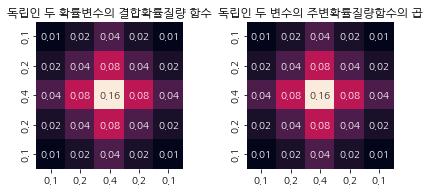

In [112]:
plt.subplot(121)
sns.heatmap(pmf1, annot=True, square=True, cbar = False, xticklabels=pmf_x, yticklabels=pmf_y)
plt.title('독립인 두 확률변수의 결합확률질량 함수')

plt.subplot(122)
sns.heatmap(pmf1x, annot=True, square=True, cbar = False, xticklabels=pmf_x, yticklabels=pmf_y)
plt.title('독립인 두 변수의 주변확률질량함수의 곱')
plt.tight_layout()
plt.show()

서로 독립이어서 나오는 값이 같다.

In [124]:
for i in range(len(pmf1)):
  print(pmf1[i, :]/pmf_y[i])

[0.1 0.2 0.4 0.2 0.1]
[0.1 0.2 0.4 0.2 0.1]
[0.1 0.2 0.4 0.2 0.1]
[0.1 0.2 0.4 0.2 0.1]
[0.1 0.2 0.4 0.2 0.1]


### 상관관계가 있는 두 확률변수

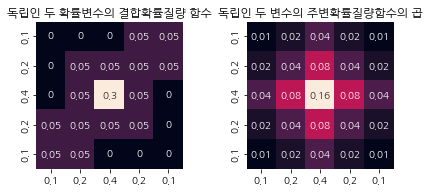

In [123]:
pmf2 = np.array([
    [0, 0, 0, 5, 5],
    [0, 5, 5, 5, 5],
    [0, 5, 30, 5, 0],
    [5, 5, 5, 5, 0],
    [5, 5, 0, 0, 0]
])

# 확률로 만들어주기
pmf2 = pmf2/pmf2.sum()

pmf2_x = pmf2.sum(axis=0)
pmf2_y = pmf2.sum(axis=1)
pmf2x = pmf2_x * pmf2_y[:,np.newaxis]

plt.subplot(121)
sns.heatmap(pmf2, annot=True, square=True, cbar = False, xticklabels=pmf2_x.round(2), yticklabels=pmf2_y.round(2))
plt.title('독립인 두 확률변수의 결합확률질량 함수')

plt.subplot(122)
sns.heatmap(pmf2x, annot=True, square=True, cbar = False, xticklabels=pmf2_x.round(2), yticklabels=pmf2_y.round(2))
plt.title('독립인 두 변수의 주변확률질량함수의 곱')
plt.tight_layout()
plt.show()

In [127]:
for i in range(len(pmf2)):
  print(pmf2[i, :]/pmf2_y[i])

[0.  0.  0.  0.5 0.5]
[0.   0.25 0.25 0.25 0.25]
[0.    0.125 0.75  0.125 0.   ]
[0.25 0.25 0.25 0.25 0.  ]
[0.5 0.5 0.  0.  0. ]
